## Problem 1: Creating basic geometries

Write your codes into a single `create_geometries.py` -file and upload the script to your personal GitHub Exercise-1 repository.

1. Create a function called `createPointGeom()` that has two parameters (x_coord, y_coord). Function should create a shapely Point geometry object and return that. 
Demonstrate the usage of the function by creating Point -objects with the function.

2. Create a function called `createLineGeom()` that takes a list of Shapely Point objects as parameter and returns a 
LineString object of those input points. Function should first check that the input list really contains Shapely Point(s). 
Demonstrate the usage of the function by creating LineString -objects with the function.

3. Create a function called `createPolyGeom()` that takes a list of coordinate tuples **OR** a list of Shapely Point objects and creates/returns 
a Polygon object of the input data. Both ways of passing the data to the function should be working. 
Demonstrate the usage of the function by passing data first with coordinate-tuples and then with Point -objects.

In [52]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

In [53]:
def createPointGeom(x_coord, y_coord):
    ''' x_coord: x coordinate (float)
        y_coord: x coordinate (float) '''
    return Point(x_coord, y_coord)

POINT (1 2) <class 'shapely.geometry.point.Point'>


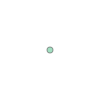

In [54]:
point = createPointGeom(1, 2)
print(point, type(point))
point

In [55]:
def createLineGeom(point_list):
    ''' point_list: list of points (shapely.geometry.point.Point) '''
    return LineString([p.x, p.y] for p in point_list)

In [56]:
p_list = [Point(0,0), Point(3,2), Point(1,1), Point(4,1)]

LINESTRING (0 0, 3 2, 1 1, 4 1) <class 'shapely.geometry.linestring.LineString'>


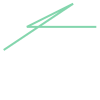

In [57]:
line = createLineGeom(p_list)
print(line, type(line))
line

In [58]:
def createPolyGeom(point_list):
    ''' point_list: list of points (list of coordinates tuples OR
                                    shapely.geometry.point.Point) '''
    if (type(point_list[0]) == tuple):
        return Polygon(shell=[tup for tup in point_list])
    elif (point_list[0].geom_type == 'Point'):
        return Polygon([[p.x, p.y] for p in point_list])
    else:
        return "Wrong input"
    

POLYGON ((0 0, 1 1, 2 3, 5 2, 0 0)) <class 'shapely.geometry.polygon.Polygon'>


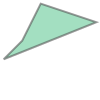

In [59]:
tuple_list = [(0,0), (1,1), (2,3), (5,2)]
polygon1 = createPolyGeom(tuple_list)
print(polygon1, type(polygon1))
polygon1

POLYGON ((0 0, 3 2, 1 1, 4 1, 0 0)) <class 'shapely.geometry.polygon.Polygon'>


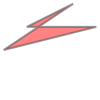

In [60]:
polygon2 = createPolyGeom(p_list)
print(polygon2, type(polygon2))
polygon2

## Problem 2: Attributes of geometries

Write your codes into a single `read_attributes.py` -file and upload the script to your personal GitHub Exercise-1 repository.

1. Create a function called `getCentroid()` that takes any kind of Shapely's geometric -object as input and returns a centroid of that geometry. Demonstrate the usage of the function.

2. Create a function called `getArea()` that takes a Shapely's Polygon -object as input and returns the area of that geometry. Demonstrate the usage of the function.

3. Create a function called `getLength()` takes either a Shapely's LineString or Polygon -object as input. Function should check the type of the input and returns the length of  the line if input is LineString and length of the exterior ring if input is Polygon. If something else is passed to the function, it should tell the user --> `"Error: LineString or Polygon geometries required!"`.  Demonstrate the usage of the function.

In [61]:
def getCentroid(shapely_elem):
    '''INPUT
    shapely_elem: shapely geometric object
    '''
    return shapely_elem.centroid

In [62]:
print(getCentroid(point))
print(getCentroid(line))
print(getCentroid(polygon1))

POINT (1 2)
POINT (1.965755634904715 1.126451270605791)
POINT (2.466666666666667 1.7)


In [63]:
def getArea(shapely_elem):
    '''INPUT
    shapely_elem: shapely geometric object Polygon
    '''
    if (shapely_elem.geom_type != 'Polygon'):
        return "Error: Polygon geometry required!"
    else:
        return shapely_elem.area

In [64]:
print(getArea(polygon1))

5.0


In [65]:
def getLength(shapely_elem):
    '''INPUT
    shapely_elem: shapely geometric object Polygon
    '''
    if (shapely_elem.geom_type not in ['Polygon', 'LineString']):
        return "Error: LineString or Polygon geometry required!"
    else:
        return shapely_elem.length

In [66]:
line.length

8.84161925296378

In [67]:
print(getLength(point))
print(getLength(line))
print(getLength(polygon1))

Error: LineString or Polygon geometry required!
8.84161925296378
12.197724007175768


## Problem 3: Reading coordinates from a file and creating a geometries 

Write your codes into a single `file_coords_to_geom.py` -file and upload the script to your personal GitHub Exercise-1 repository.

One of the "classical" problems in GIS is the situation where you have a set of coordinates in a file and you need to get them into a map (or into a GIS-software). Python is a really handy
tool to solve this problem as with Python it is basically possible to read data from any kind of input datafile (such as csv-, txt-, excel-, or gpx-files (gps data) or from different databases). 
So far, I haven't faced any kind of data or file that would be impossible to read with Python. 

Thus, let's see how we can read data from a file and create Point -objects from them that can be saved e.g. as a new Shapefile (we will learn this next week). 
Our dataset **[travelTimes_2015_Helsinki.txt](data/travelTimes_2015_Helsinki.txt)** consist of 
travel times between specific locations in Helsinki Region. The first four rows of our data looks like this:

```
   from_id;to_id;fromid_toid;route_number;at;from_x;from_y;to_x;to_y;total_route_time;route_time;route_distance;route_total_lines
   5861326;5785640;5861326_5785640;1;08:10;24.9704379;60.3119173;24.8560344;60.399940599999994;125.0;99.0;22917.6;2.0
   5861326;5785641;5861326_5785641;1;08:10;24.9704379;60.3119173;24.8605682;60.4000135;123.0;102.0;23123.5;2.0
   5861326;5785642;5861326_5785642;1;08:10;24.9704379;60.3119173;24.865102;60.4000863;125.0;103.0;23241.3;2.0
```

Thus, we have many columns of data, but the few important ones are:

| Column | Description |
|--------|-------------|
| from_x | x-coordinate of the **origin** location (longitude) |
| from_y | y-coordinate of the **origin** location (latitude) |
| to_x   | x-coordinate of the **destination** location (longitude)|
| to_y   | y-coordinate of the **destination** location (latitude) |
| total_route_time | Travel time with public transportation at the route |

### Tasks

1. Save the [travelTimes_2015_Helsinki.txt](data/travelTimes_2015_Helsinki.txt) into your computer.
2. Read 4 columns, i.e. 'from_x', 'from_y', 'to_x', 'to_y' from the data into Python using Pandas.
3. Create two lists called `orig_points` and `dest_points`
4. Iterate over the rows of your DataFrame and add Shapely Point -objects into the orig_points -list and dest_point -list representing the origin 
locations and destination locations accordingly.

In [68]:
import pandas as pd

In [69]:
df = pd.read_csv("travelTimes_2015_Helsinki.txt", sep=";")
df = df[['from_x', 'from_y', 'to_x', 'to_y']]
df.head()

,from_x,from_y,to_x,to_y
0,24.970438,60.311917,24.856034,60.399941
1,24.970438,60.311917,24.860568,60.400014
2,24.970438,60.311917,24.865102,60.400086
3,24.970438,60.311917,24.869636,60.400159
4,24.970438,60.311917,24.842582,60.397478


In [70]:
#df['from'] = Point(df['from_x'], df['from_y'])
orig_points = []
dest_points = []
for index, row in df.iterrows():
    #print(row['from_x'])
    orig_points.append(Point(row['from_x'], row['from_y']))
    dest_points.append(Point(row['to_x'], row['to_y']))
    

In [71]:
print(len(orig_points), len(dest_points))

14643 14643


## Problem 4: Creating LineStrings that represent the movements (optional task for advanced students):

This is an optional extra task for those who likes to learn even more. Write your codes into the same file as in previous Problem (3). 
   
1. Create a list called `lines`
2. Iterate over the origin and destination lists and create a Shapely LineString -object between the origin and destination point
3. Add that line into the lines -list.
4. Find out what is the average (Euclidian) distance of all the origin-destination LineStrings that we just created, and print it out.
5. To make things more reusable: write creation of the LineString and calculating the average distance into dedicated functions and use them.  

In [72]:
lines = []

#Create the LineStrings from the origin-destination Points
for i in range(len(orig_points)):
    lines.append(LineString([orig_points[i], dest_points[i]]))

distances = [] #List of legths
for line in lines:
    distances.append(line.length)

EuclideanAvg = sum(distances) / float(len(distances))
print("The Euclidean average distance of all origin-destination lines is: {:5f}".format(EuclideanAvg))

The Euclidean average distance of all origin-destination lines is: 0.215022
